# <h1>Demo, Structures </h1> <h2>This Notebook Demonstrates</h2> <ul> <li>Getting data from sensorcloud</li> <li>Graphing time history data </li> <li>Graphing frequency domain </li> <li>Finding Peaks </li> <li>Writing Data to SensorCloud </li> </ul>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#settins for plots
matplotlib.rcParams['figure.figsize'] = (12,5)
matplotlib.rcParams['savefig.dpi'] = 100

In [2]:
from IPython.display import IFrame
IFrame('https://sensorcloud.microstrain.com/SensorCloud/data/OAPI0039T2KSFD6X/js-embed/?ch=32582(Strain-LP-5hz)', width=1000, height=600)

## Getting Data From SensorCloud Repository

In [4]:
#Get data from SensorCloud repository
repo = TimeSeriesRepo('OAPI0039T2KSFD6X')
inSensor = '32582'
inChannel ='Strain-LP-5hz'
allSeries = repo.getAllTimeSeries( inSensor, inChannel, startTime=1421448021902137000, endTime=1421448059429497000 )

series = allSeries[0] #renames data magnitudes to series array

#separate times and data from array and convert to numpy array
timestamps = series.getTimeStamps()
times = np.array(series.getTimeStamps())
data = np.array(series.getData())

#convert timestamps into seconds for plotting
#start = times[0]
#times = (times - start)/NANO_PER_SEC

## Plotting Data

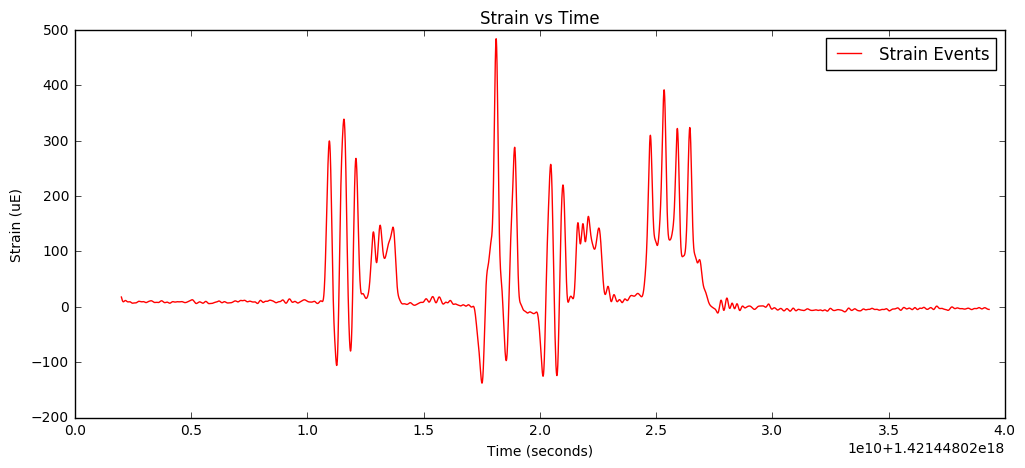

In [12]:
plt.plot(times, data ,'r', alpha = 1, label='Strain Events',linestyle = '-')
plt.xlabel("Time (seconds)")
plt.ylabel("Strain (uE)")
plt.title('Strain vs Time')
plt.legend(loc='upper right')   

## Strain to Stress

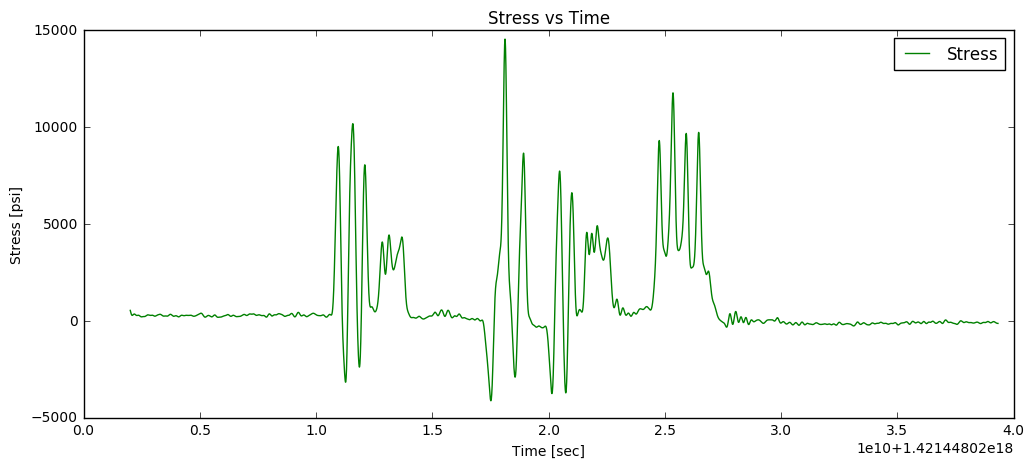

In [13]:
modulus = 30e6
microstrain_to_strain = 1e6
stress = (data/microstrain_to_strain)* modulus 

plt.plot(times, stress, 'g', alpha=1, label='Stress', linestyle = '-')
plt.xlabel('Time [sec]')
plt.ylabel('Stress [psi]')
plt.title('Stress vs Time')
plt.legend(loc='upper right')

In [14]:
timestamps = map( lambda x: x[0], series)
values = map( lambda x: x[1], series)

arrayV = np.array(values)
arrayT = np.array(timestamps)

## Finding Peaks in Strain

In [15]:
i=0
peak_searching = 1
valley_searching = 0
threshold = 20

tentative_peak = arrayV[0]
tentative_peak_time = arrayT[0]

timestamps_peaks = []
array_peaks = []

for x in range(len(arrayV)):
    if (peak_searching == 1):
        if arrayV[x]>tentative_peak: 
            tentative_peak = arrayV[x]
            tentative_peak_time = arrayT[x]
        if arrayV[x]<tentative_peak-threshold:
            timestamps_peaks.append(tentative_peak_time)
            array_peaks.append(tentative_peak)
            i = i+1
            valley_searching = 1
            peak_searching = 0
    elif (valley_searching == 1):
        if arrayV[x]<tentative_peak:
            tentative_peak = arrayV[x]
            tentative_peak_time = arrayT[x]
        if arrayV[x]>tentative_peak+threshold:
            timestamps_peaks.append(tentative_peak_time)
            array_peaks.append(tentative_peak)
            peak_searching = 1
            valley_searching = 0
            
outData = zip(timestamps_peaks, array_peaks)
print i

19


## Plotting found peaks

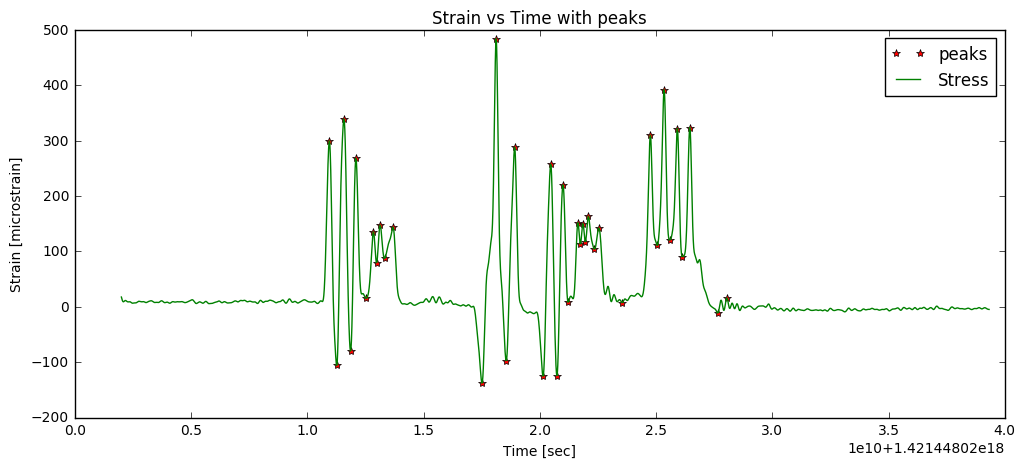

In [16]:
plt.plot(timestamps_peaks, array_peaks, '*r', linestyle = ' ', label = 'peaks' )
plt.plot(times, data, 'g', alpha=1, label='Stress', linestyle = '-')

plt.xlabel('Time [sec]')
plt.ylabel('Strain [microstrain]')
plt.title('Strain vs Time with peaks')
plt.legend(loc='upper right') 

In [20]:
#to save new series
#outSeries = repo.createTimeSeries(inSensor, inChannel + '_peaks', series.getSampleRate(), series.getSampleRateType())
#outSeries.push(outData)
#outSeries.save()
#outSeries.tagAsMathengine()